<a href="https://colab.research.google.com/github/azzindani/02_Deep_Learning_ANN/blob/main/DL_Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Version 20240820

## 00 Importing Modules & Mounting Drive

In [ ]:
!pip install ydata-profiling

import pathlib
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import numpy as np
import pandas as pd
import sklearn
import pickle
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
import tensorflow as tf
import datetime as dt

from scipy import stats as sm
from IPython.display import Image
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, average_precision_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from ydata_profiling import ProfileReport
from tabulate import tabulate
from tensorflow.keras import layers, losses, initializers, Model, regularizers, activations

%matplotlib inline

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive') #'''

"from google.colab import drive\ndrive.mount('/content/drive') #"

In [ ]:
'''MAIN_PATH = str(pathlib.Path().resolve())
WORK_PATH = MAIN_PATH + '/drive/MyDrive/Workspace'
SOURCE_PATH = WORK_PATH + '/00_Data_Source'
CACHE_PATH = WORK_PATH + '/00_Cache_Data' #'''

"MAIN_PATH = str(pathlib.Path().resolve())\nWORK_PATH = MAIN_PATH + '/drive/MyDrive/Workspace'\nSOURCE_PATH = WORK_PATH + '/00_Data_Source'\nCACHE_PATH = WORK_PATH + '/00_Cache_Data' #"

## 01 Choosing & Importing Dataset

### 01.00 Importing Data from Zipfile

In [ ]:
'''filename = 'Diseases_And_Symptoms.zip' # replace this

url = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename
http_response = urlopen(url)
zipfile = ZipFile(BytesIO(http_response.read()))
zipfile.extractall() #'''

"filename = 'Diseases_And_Symptoms.zip' # replace this\n\nurl = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename\nhttp_response = urlopen(url)\nzipfile = ZipFile(BytesIO(http_response.read()))\nzipfile.extractall() #"

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
'''df = pd.read_csv(os.listdir()[1], encoding = 'ISO-8859-1')#, sep = ';')
df.shape #'''

"df = pd.read_csv(os.listdir()[1], encoding = 'ISO-8859-1')#, sep = ';')\ndf.shape #"

### 01.01 Importing Main Data

In [ ]:
filename = 'Cardiovascular_Disease.csv' # replace this

url = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename
df = pd.read_csv(url, encoding = 'ISO-8859-1')#, sep = ';')
df.shape #'''

(68205, 17)

In [ ]:
df.nunique()

,0
id,68205
age,8061
gender,2
height,106
weight,278
ap_hi,86
ap_lo,58
cholesterol,3
gluc,3
smoke,2


In [ ]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
for column in df.columns:
  if df[column].dtypes == 'object':
    print(column)
    print('-' * 100)
    print(df[column].unique())
    print('=' * 100)

bp_category
----------------------------------------------------------------------------------------------------
['Hypertension Stage 1' 'Hypertension Stage 2' 'Normal' 'Elevated']
bp_category_encoded
----------------------------------------------------------------------------------------------------
['Hypertension Stage 1' 'Hypertension Stage 2' 'Normal' 'Elevated']


### 01.02 Importing Geo Data

In [ ]:
'''geo_path = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # replace this

gdf = gpd.read_file(geo_path)
gdf.head(2) #'''

"geo_path = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # replace this\n\ngdf = gpd.read_file(geo_path)\ngdf.head(2) #"

In [ ]:
'''gdf = gdf.rename(columns = {'name' : 'State'})
gdf = gdf[['State', 'geometry']]
gdf.head(2) #'''

"gdf = gdf.rename(columns = {'name' : 'State'})\ngdf = gdf[['State', 'geometry']]\ngdf.head(2) #"

### 01.03 Importing Additional Data (for enrichment)

### 01.04 Dataframe Back Up

In [ ]:
df_bu = df.copy()

## 02 Data Structuring

### 02.01 Selecting & Dropping Variables

In [ ]:
column_list = [] # fill this

df = df.drop(column_list, axis = 1)
df.head(2) #'''

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2


### 02.02 Cleaning Text Object

#### 02.02.01 Convert Header to Proper Text

In [ ]:
'''for x in df.columns:
  y = x.title()
  df = df.rename(columns = {x : y}) #'''

'for x in df.columns:\n  y = x.title()\n  df = df.rename(columns = {x : y}) #'

#### 02.02.02 Strip Abnormal Spaces

In [ ]:
'''for x in df.columns:
  if df[x].dtypes == 'object':
    try:
      df[x] = df[x].str.strip()
    except:
      pass #'''

"for x in df.columns:\n  if df[x].dtypes == 'object':\n    try:\n      df[x] = df[x].str.strip()\n    except:\n      pass #"

#### 02.02.03 Convert Object Content to Proper Text

In [ ]:
'''for x in df.columns:
  if df[x].dtypes == 'object':
    for a in df[x].unique():
      b = a.title()
      df[x] = df[x].replace(a, b)
  else:
    pass #'''

"for x in df.columns:\n  if df[x].dtypes == 'object':\n    for a in df[x].unique():\n      b = a.title()\n      df[x] = df[x].replace(a, b)\n  else:\n    pass #"

### 02.03 Coverting Data

#### 02.03.01 Convert to date

In [ ]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2


In [ ]:
column_list = ['Activity Period Start Date'] # fill this

for x in column_list:
  try:
    df[x] = pd.to_datetime(df[x])
  except:
    pass #'''

#### 02.03.02 Convert to integer

In [ ]:
column_list = [] # fill this

for x in column_list:
  df[x] = df[x].astype('int') #'''

#### 02.03.03 Convert to Object (if necessary)

In [ ]:
column_list = [] # fill this

for x in column_list:
  df[x] = df[x].astype('str') #'''

#### 02.03.04 Replace 0 to Nan (if necessary)

In [ ]:
#df = df.replace(0, np.nan)

#### 02.03.05 Filling 0 to Nan

In [ ]:
'''for column in df.columns:
  if df[column].dtype == 'float64' or df[column].dtype == 'int64':
    df[column] = df[column].fillna(0)
    print(column)
  else:
    pass #'''

"for column in df.columns:\n  if df[column].dtype == 'float64' or df[column].dtype == 'int64':\n    df[column] = df[column].fillna(0)\n    print(column)\n  else:\n    pass #"

#### 02.03.06 Dropping Nan

In [ ]:
#df = df.dropna()

## 03 Data Cleaning

### 03.01 Replacing Variable Component

In [ ]:
'''value_dict = {} # fill this

column_name = ''

df[column_name] = df[column_name].replace(value_dict) #'''

"value_dict = {} # fill this\n\ncolumn_name = ''\n\ndf[column_name] = df[column_name].replace(value_dict) #"

### 03.02 Add New Variable

#### 03.02.01 Add by Math Calculation

In [ ]:
'''new_var = '' # fill this
obj_var1 = '' # fill this
obj_var2 = '' # fill this

df[new_var] = df[obj_var1] * df [obj_var2] #'''

"new_var = '' # fill this\nobj_var1 = '' # fill this\nobj_var2 = '' # fill this\n\ndf[new_var] = df[obj_var1] * df [obj_var2] #"

#### 03.02.02 Add by Replacing "Other"

In [ ]:
'''column_name = '' # fill this

df[column_name].value_counts() #'''

"column_name = '' # fill this\n\ndf[column_name].value_counts() #"

In [ ]:
'''value_thres = 1300

replace_list = []

df_dict = df[column_name].value_counts().to_dict()
for i in df_dict:
  if df_dict[i] < value_thres:
    replace_list.append(i)

replace_list #'''

'value_thres = 1300\n\nreplace_list = []\n\ndf_dict = df[column_name].value_counts().to_dict()\nfor i in df_dict:\n  if df_dict[i] < value_thres:\n    replace_list.append(i)\n\nreplace_list #'

In [ ]:
'''df[column_name] = df[column_name].copy().replace(to_replace = replace_list, value = 'Other') #'''

"df[column_name] = df[column_name].copy().replace(to_replace = replace_list, value = 'Other') #"

### 03.03 Inaccuracies

In [ ]:
column_list = [] # fill this

for x in column_list:
  try:
    df[x] = df[x].replace('0', np.nan)
    df = df.dropna()
  except:
    pass

### 03.04 Handling

##### Data Distribution Check (Before)

In [ ]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
'''x = 'current_month_debit' # replace this
y = 'current_month_balance' # replace this
color = 'occupation' # replace this

fig = px.histogram(
  df,
  x = x,
  y = y,
  color = color,
  marginal = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'current_month_debit' # replace this\ny = 'current_month_balance' # replace this\ncolor = 'occupation' # replace this\n\nfig = px.histogram(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

In [ ]:
'''x = 'current_month_debit' # replace this
y = 'current_month_balance' # replace this
color = 'occupation' # replace this

fig = px.scatter(
  df,
  x = x,
  y = y,
  color = color,
  marginal_x = 'histogram',
  marginal_y = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'current_month_debit' # replace this\ny = 'current_month_balance' # replace this\ncolor = 'occupation' # replace this\n\nfig = px.scatter(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal_x = 'histogram',\n  marginal_y = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

#### 03.04.01 Using IQR (Inter Quantile Range)

In [ ]:
def iqr_thres(dataframe, column, th1 = 0.25, th3 = 0.75):
  quartile1 = dataframe[column].quantile(th1)
  quartile3 = dataframe[column].quantile(th3)
  iqr = quartile3 - quartile1
  upper_limit = quartile3 + 1.5 * iqr
  lower_limit = quartile1 - 1.5 * iqr

  return lower_limit, upper_limit

In [ ]:
def check_outliers_iqr(dataframe, column):
  lower_limit, upper_limit = iqr_thres(dataframe, column)
  if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis = None):
    return True
  else:
    return False

In [ ]:
def replace_iqr(dataframe, columns, th1 = 0.25, th3 = 0.75, replace = False):
  data = []

  for column in columns:
    if dataframe[column].dtypes == 'int64' or dataframe[column].dtypes == 'float64':
      if column != 'Outcome':
        outliers_ = check_outliers_iqr(dataframe, column)
        count = None
        lower_limit, upper_limit = iqr_thres(dataframe, column, th1, th3)

        if outliers_:
          count = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)][column].count()
          if replace:
            if lower_limit < 0:
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
            else:
              dataframe.loc[(dataframe[column] < lower_limit), column] = np.nan
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
        outliers_status = check_outliers_iqr(dataframe, column)
        data.append([outliers_, outliers_status, count, column, lower_limit, upper_limit ])

  table = tabulate(data, headers = ['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt = 'rst', numalign = 'right')
  print('Removing Outliers using IQR')
  print(table)

In [ ]:
column_list = [] # fill this

replace_iqr(
  dataframe = df,
  columns = column_list,
  replace = True
)
df = df.dropna()#'''

Removing Outliers using IQR
=======================  ==========  =======  ========  =============  =============
Outliers (Previously)    Outliers    Count    Column    Lower Limit    Upper Limit
=======================  ==========  =======  ========  =============  =============
=======================  ==========  =======  ========  =============  =============


#### 03.04.02 Using Standard Deviation

In [ ]:
def std_thres(dataframe, column):
  upper_limit = dataframe[column].mean() + 3 * dataframe[column].std()
  lower_limit = dataframe[column].mean() - 3 * dataframe[column].std()

  return lower_limit, upper_limit

In [ ]:
def check_outliers_std(dataframe, column):
  lower_limit, upper_limit = std_thres(dataframe, column)
  if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis = None):
    return True
  else:
    return False

In [ ]:
def replace_std(dataframe, columns, replace = False):
  data = []

  for column in columns:
    if dataframe[column].dtypes == 'int64' or dataframe[column].dtypes == 'float64':
      if column != 'Outcome':
        outliers_ = check_outliers_std(dataframe, column)
        count = None
        lower_limit, upper_limit = std_thres(dataframe, column)

        if outliers_:
          count = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)][column].count()
          if replace:
            if lower_limit < 0:
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
            else:
              dataframe.loc[(dataframe[column] < lower_limit), column] = np.nan
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
        outliers_status = check_outliers_std(dataframe, column)
        data.append([outliers_, outliers_status, count, column, lower_limit, upper_limit])

  table = tabulate(data, headers = ['Outlier (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt = 'rst', numalign = 'right')
  print('Removing Outliers using 3 Standard Deviation')
  print(table)

In [ ]:
column_list = [] # fill this

replace_std(
  dataframe = df,
  columns = column_list,
  replace = True
)
df = df.dropna()#'''

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ========  =============  =============
Outlier (Previously)    Outliers    Count    Column    Lower Limit    Upper Limit
======================  ==========  =======  ========  =============  =============
======================  ==========  =======  ========  =============  =============


### 03.05 Handling Missing / Zeros / Null
##### Filling missing value (numerical only) is better using median than mean or mode

#### 03.05.01 Detecting Zero Value

In [ ]:
zero_columns = [] # fill this

for x in df.columns:
  if df[x].dtypes == 'int64' or df[x].dtypes == 'float64':
    if (df[x] == 0).sum() != 0:
      print(x, ':', str((df[x] == 0).sum()))
      zero_columns.append(x)

zero_columns #'''

id : 1
smoke : 62226
alco : 64581
active : 13399
cardio : 34533


['id', 'smoke', 'alco', 'active', 'cardio']

#### 03.05.02 Detecting Nan / Non Available Value

In [ ]:
nan_columns = [] # fill this

for x in df.columns:
  if df[x].dtypes == 'object':
    if (df[x] == np.nan).sum() or (df[x] == '-').sum() != 0:
      print(x, ':', str((df[x] == np.nan).sum()))
      nan_columns.append(x)

nan_columns #'''

[]

#### 03.05.03 Replacing Zero with Mean (for numerical value if median value == 0), if necessary

In [ ]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].mean()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].mean()) #'

#### 03.05.04 Replacing Zero with Median (for numerical value if median value != 0), if necessary

In [ ]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].median()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].median()) #'

#### 03.05.05 Replacing Zero with Mode (for categorical / object value), if necessary

In [ ]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].mode()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].mode()) #'

### 03.06 Handling Incomplete Data

### 03.07 Handling Data Biases

### 03.08 Handling Duplicates

In [ ]:
#df = df.drop_duplicates()

##### Data Distribution Check (After)

In [ ]:
'''x = 'current_month_debit' # replace this
y = 'current_month_balance' # replace this
color = 'occupation' # replace this

fig = px.histogram(
  df,
  x = x,
  y = y,
  color = color,
  marginal = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'current_month_debit' # replace this\ny = 'current_month_balance' # replace this\ncolor = 'occupation' # replace this\n\nfig = px.histogram(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

In [ ]:
'''x = 'current_month_debit' # replace this
y = 'current_month_balance' # replace this
color = 'occupation' # replace this

fig = px.scatter(
  df,
  x = x,
  y = y,
  color = color,
  marginal_x = 'histogram',
  marginal_y = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'current_month_debit' # replace this\ny = 'current_month_balance' # replace this\ncolor = 'occupation' # replace this\n\nfig = px.scatter(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal_x = 'histogram',\n  marginal_y = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

## 04 Enriching Data
#### take other dataset, inside or outside from related dataset / business

In [ ]:
'''location = 'Country' # replace this

a = df[location].unique()
b = gdf[location].unique()

for i in a:
  if i not in b:
    print(i)

print(50 * '=')

for i in b:
  if i not in a:
    print(i) #'''

"location = 'Country' # replace this\n\na = df[location].unique()\nb = gdf[location].unique()\n\nfor i in a:\n  if i not in b:\n    print(i)\n\nprint(50 * '=')\n\nfor i in b:\n  if i not in a:\n    print(i) #"

In [ ]:
value_dict = {}

try:
  df[location] = df[location].replace(value_dict)
except:
  pass #'''

## 05 Data Validation
#### Verifying consistency, quality, and security of data

## 06 Exploration Data Analysis (Univariate)

In [ ]:
'''data_profile = ProfileReport(
  df,
  correlations = {
    'pearson' : {'calculate' : True},
    'spearman' : {'calculate' : True},
    'kendall' : {'calculate' : True},
    'phi_k' : {'calculate' : True},
    'cramers': {'calculate' : True},
  },
)

data_profile #'''

"data_profile = ProfileReport(\n  df,\n  correlations = {\n    'pearson' : {'calculate' : True},\n    'spearman' : {'calculate' : True},\n    'kendall' : {'calculate' : True},\n    'phi_k' : {'calculate' : True},\n    'cramers': {'calculate' : True},\n  },\n)\n\ndata_profile #"

## 07 Select Variable X & Y | Splitting Data

#### 07.01 Data Balancing

In [ ]:
'''# Check Before Data Balancing
y_var = 'HeartDisease'

fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in df[y_var].value_counts()]
labels = list(df[y_var].value_counts().index)

ax.pie(
  x = sizes,
  labels = labels,
  autopct = '%1.1f%%',
)
plt.show() #'''

"# Check Before Data Balancing\ny_var = 'HeartDisease'\n\nfig, ax = plt.subplots(figsize = (5, 5))\nsizes = [count for count in df[y_var].value_counts()]\nlabels = list(df[y_var].value_counts().index)\n\nax.pie(\n  x = sizes,\n  labels = labels,\n  autopct = '%1.1f%%',\n)\nplt.show() #"

In [ ]:
'''n = 20000
append_data = []

for i in df[y_var].unique():
  df_x = df[df[y_var] == i][:n]
  append_data.append(df_x)

append_df = pd.concat(append_data)
append_df.shape #'''

'n = 20000\nappend_data = []\n\nfor i in df[y_var].unique():\n  df_x = df[df[y_var] == i][:n]\n  append_data.append(df_x)\n\nappend_df = pd.concat(append_data)\nappend_df.shape #'

In [ ]:
'''# Check After Data Balancing

fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in append_df[y_var].value_counts()]
labels = list(append_df[y_var].value_counts().index)

ax.pie(
  x = sizes,
  labels = labels,
  autopct = '%1.1f%%',
)
plt.show() #'''

"# Check After Data Balancing\n\nfig, ax = plt.subplots(figsize = (5, 5))\nsizes = [count for count in append_df[y_var].value_counts()]\nlabels = list(append_df[y_var].value_counts().index)\n\nax.pie(\n  x = sizes,\n  labels = labels,\n  autopct = '%1.1f%%',\n)\nplt.show() #"

In [ ]:
#df = append_df

### 07.02 Label Encoding / One Hot Encoding

#### 07.02.01 First Method

In [ ]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
y_var = 'bp_category'

class_dict = {}
count = 0
for cat in df[y_var].unique():
  class_dict[cat] = count
  count = count + 1

class_dict #'''

{'Hypertension Stage 1': 0,
 'Hypertension Stage 2': 1,
 'Normal': 2,
 'Elevated': 3}

In [ ]:
rev_class_dict = {v: k for k, v in class_dict.items()}

In [ ]:
df[y_var] = df[y_var].replace(class_dict)

#### 07.02.02 Second Method

In [ ]:
columns = [] # fill selected columns

for column in columns:
  df[column] = df[column].astype('str')
  print(df[column].unique())

In [ ]:
label_encoders = {}

for column in columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

for column in columns:
  labels = label_encoders[column].classes_
  print(column)
  print('-' * 50)
  for i in range(len(labels)):
    print(str(i), ':', labels[i])
  print('=' * 50)

### 07.03 Define X & Y variables

In [ ]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,0,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,1,Hypertension Stage 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
x_var = [
  'age',
  'gender',
  'height',
  'weight',
  'ap_hi',
  'ap_lo',
  'cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active',
  'cardio',
  'age_years',
  'bmi'
]
#x_var = df.columns[1:]
y_var = 'bp_category'

x = df[x_var]
y = df[y_var]

#sel_var = y_var + x_var
#df = df[sel_var]
x.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679


In [ ]:
x = np.array(x)
y = np.array(y)

### 07.04 Split Data

In [ ]:
sc = StandardScaler()

x_train, x_tosplit, y_train, y_tosplit = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split(x_tosplit, y_tosplit, test_size = 0.4, random_state = 42)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('x_val shape :', x_val.shape)
print('=' * 50)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)
print('y_val shape :', y_val.shape)

x_train shape : (47743, 14)
x_test shape : (12277, 14)
x_val shape : (8185, 14)
y_train shape : (47743,)
y_test shape : (12277,)
y_val shape : (8185,)


In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

In [ ]:
y_classes = len(df[y_var].unique())
y_classes

4

## 08 Building Deep Learning Model

In [ ]:
inp = layers.Input(shape = (x_train.shape[1],))

x = layers.Dense(units = 128, activation = 'relu')(inp)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(units = 256, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(units = y_classes, activation = 'softmax', name = 'fc' + str(10))(x)

In [ ]:
model = Model(inputs = inp, outputs = x, name = 'Model_X')
model.summary()

Model: "Model_X"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc10 (Dense)                         │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,508 (146.52 KB)

 Trainable params: 36,740 (143.52 KB)

 Non-trainable params: 768 (3.00 KB)

## 09 Set Up Training

In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
  def __init__(self, threshold):
    super(MyThresholdCallback, self).__init__()
    self.threshold = threshold

  def on_epoch_end(self, epoch, logs=None):
    val_acc = logs['val_accuracy']
    acc = logs['accuracy']
    if val_acc >= self.threshold and acc >= self.threshold:
        self.model.stop_training = True

In [ ]:
es_callback = MyThresholdCallback(threshold = 0.98)

In [ ]:
model.compile(optimizer = 'adam', loss = losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

## 10 Model Training (Data Validation Included)

In [ ]:
history = model.fit(
  x_train,
  y_train,
  batch_size = 512,
  epochs = 500,
  validation_data = (x_val, y_val),
  callbacks = es_callback
)

Epoch 1/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7936 - loss: 0.5995 - val_accuracy: 0.9122 - val_loss: 0.7148
Epoch 2/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9432 - loss: 0.1870 - val_accuracy: 0.9403 - val_loss: 0.4277
Epoch 3/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9741 - loss: 0.1003 - val_accuracy: 0.9527 - val_loss: 0.2197
Epoch 4/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9854 - loss: 0.0631 - val_accuracy: 0.9706 - val_loss: 0.1050
Epoch 5/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9886 - loss: 0.0480 - val_accuracy: 0.9886 - val_loss: 0.0501


<Figure size 640x480 with 0 Axes>

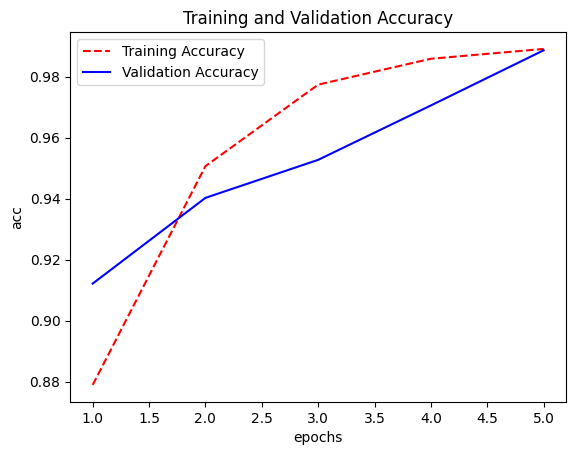

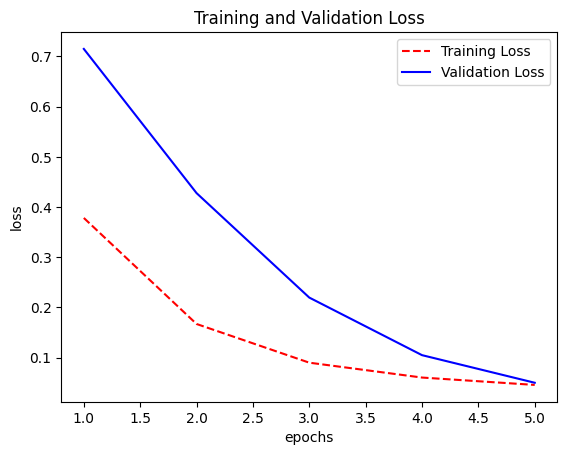

<Figure size 640x480 with 0 Axes>

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1, 1)

plt.plot(epochs, acc, 'r--', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r--', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.figure()

## 11 Model Testing

In [ ]:
model.evaluate(x_test, y_test)

384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9882 - loss: 0.0539


[0.055039796978235245, 0.9872118830680847]

## 12 Saving Trained Model

In [ ]:
'''filename = str(dt.datetime.today().strftime('%Y%m%d_%H%M'))
save_dir = '/content/' + filename

model_json = model.to_json()
with open (save_dir + '.json', 'w') as json_file:
  json_file.write('/content/' + model_json)

model.save(save_dir + '.h5') #'''

"filename = str(dt.datetime.today().strftime('%Y%m%d_%H%M'))\nsave_dir = '/content/' + filename\n\nmodel_json = model.to_json()\nwith open (save_dir + '.json', 'w') as json_file:\n  json_file.write('/content/' + model_json)\n\nmodel.save(save_dir + '.h5') #"

## 13 Checking The Result

### 13.01 Classification Report

In [ ]:
y_predicted = np.argmax(model.predict(x_test), axis = -1)
cr = classification_report(y_test, y_predicted)

print('Classification Report\n', cr)

384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7242
           1       0.99      0.98      0.98      2754
           2       1.00      0.99      1.00      1725
           3       0.99      0.91      0.95       556

    accuracy                           0.99     12277
   macro avg       0.99      0.97      0.98     12277
weighted avg       0.99      0.99      0.99     12277



### 13.02 Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[7208,   33,    0,    1],
       [  63, 2691,    0,    0],
       [   7,    0, 1716,    2],
       [  50,    0,    1,  505]])

Confusion Matrix


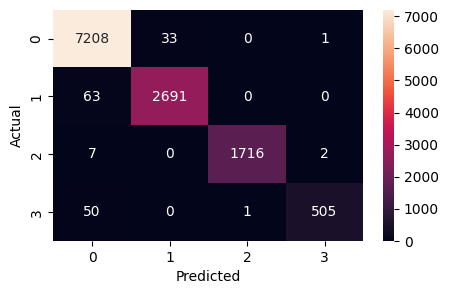

In [ ]:
print('Confusion Matrix')
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() #'''

### 13.03 Prediction Table

In [ ]:
test_label = []
predict_label = []
label_name =  []
predict_name = []
prediction_score = []

for i in range(0, 1000): #x_test.shape[0]):
  test_label.append(y_test[i])
  t_label = rev_class_dict[y_test[i]]
  label_name.append(t_label)

  img = x_test[i]
  img = tf.expand_dims(img, axis = 0)
  prediction = model.predict(img)
  dense = prediction.reshape(-1).tolist()
  score = max(dense)
  index = dense.index(score)
  predict_label.append(index)

  p_label = rev_class_dict[index]
  predict_name.append(p_label)

  prediction_score.append(score)

prediction_result = pd.DataFrame({
  'label_num' : test_label,
  'label_name' : label_name,
  'predict_num' : predict_label,
  'predict_name' : predict_name,
  'predict_score' : prediction_score,
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━

In [ ]:
prediction_result['pred_check'] = prediction_result['label_num'] == prediction_result['predict_num']
prediction_result.head()

,label_num,label_name,predict_num,predict_name,predict_score,pred_check
0,1,Hypertension Stage 2,1,Hypertension Stage 2,1.000000,True
1,0,Hypertension Stage 1,0,Hypertension Stage 1,0.983408,True
2,0,Hypertension Stage 1,0,Hypertension Stage 1,0.987717,True
3,0,Hypertension Stage 1,0,Hypertension Stage 1,0.990373,True
4,0,Hypertension Stage 1,0,Hypertension Stage 1,0.988462,True


### 13.04.F1 Score

In [ ]:
labels = df[y_var].tolist()

f1_scores = f1_score(prediction_result['label_name'], prediction_result['predict_name'], average = None, labels = labels)
f1_dict = {label : score for label, score in zip(labels, f1_scores)}

f1_df = pd.DataFrame(list(f1_dict.items()), columns = ['class', 'f1_score'])
f1_df = f1_df.sort_values(by = 'f1_score', ascending = False).reset_index(drop = True)
f1_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


,class,f1_score
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0


<Axes: xlabel='f1_score', ylabel='class'>

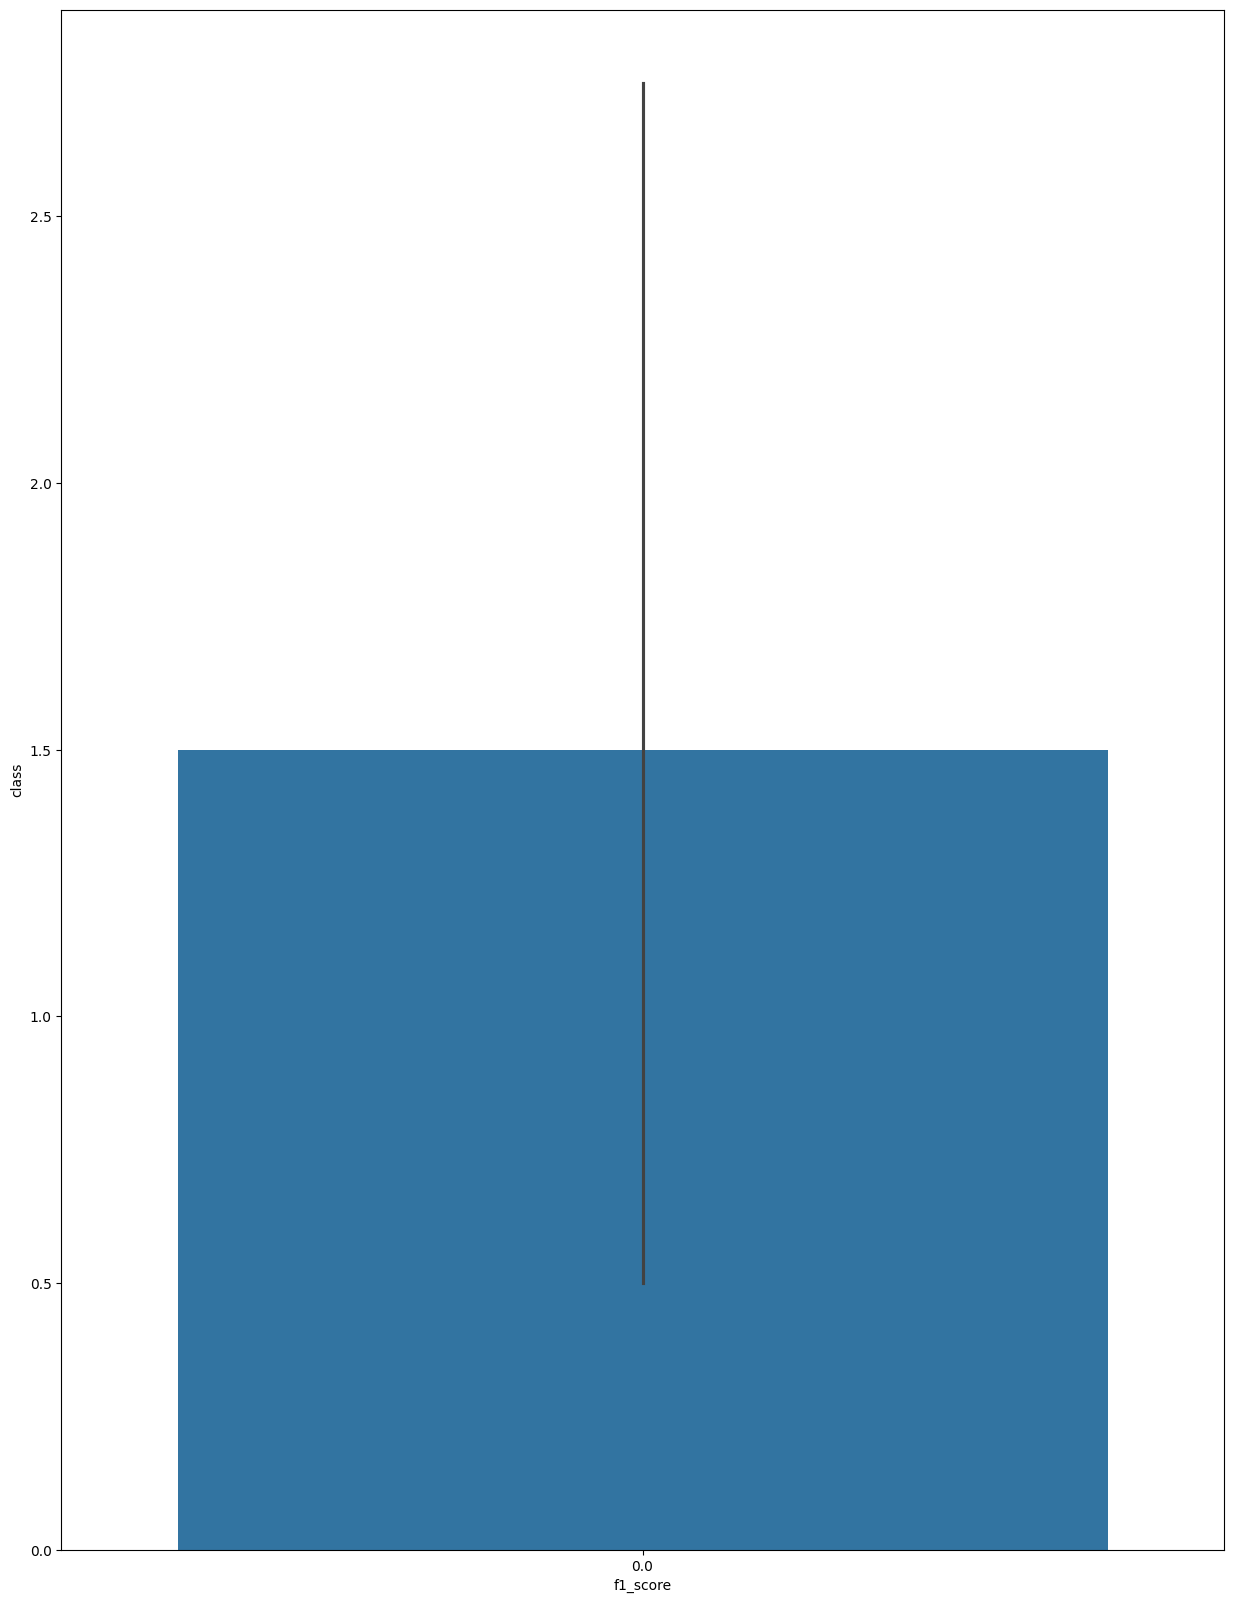

In [ ]:
plt.figure(figsize = (15, 20), dpi = 100)
sns.barplot(x = f1_df['f1_score'], y = f1_df['class'])

### 13.05 False Prediction

In [ ]:
false_pred = prediction_result[prediction_result['pred_check'] == False].sort_values('predict_score', ascending = False)
false_pred.head()

,label_num,label_name,predict_num,predict_name,predict_score,pred_check
65,3,Elevated,0,Hypertension Stage 1,0.993436,False
562,0,Hypertension Stage 1,1,Hypertension Stage 2,0.972359,False
933,3,Elevated,0,Hypertension Stage 1,0.931438,False
804,3,Elevated,0,Hypertension Stage 1,0.917081,False
252,0,Hypertension Stage 1,1,Hypertension Stage 2,0.890423,False


In [ ]:
false = round(false_pred.shape[0] / x_test.shape[0] * 100, 2)
print('Amount of False Prediction :', false, '%')

Amount of False Prediction : 0.07 %
